# Climate Change Analysis 
This is a Data Analysis Notebook to explore the data from [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data/data#) on 
"Climate Change: Earth Surface Temperature Data Exploring global temperatures since 1750". 

First you have to download the the data containing the following files: 

- GlobalLandTemperaturesByCity.csv	
- GlobalLandTemperaturesByMajorCity.csv	
- GlobalTemperatures.csv
- GlobalLandTemperaturesByCountry.csv	
- GlobalLandTemperaturesByState.csv

In [71]:
# Import Libraries 
import numpy as np 
import pandas as pd 
import os 
import glob
import matplotlib.pyplot as plt 
import scipy.stats as stats
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
def datetime(x):
    return np.array(x, dtype=np.datetime64)
def runmean(x,N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')




def plots_stats(df, city="Hanoi"):
    
    


    df['AverageTemperature'].fillna(df.AverageTemperature.mean(), inplace=True)
    
    df_1800 = df[(datetime(df.dt) > datetime('1810-01-01')) & (datetime(df.dt) < datetime('1910-01-01'))]
    df_1900 = df[(datetime(df.dt) > datetime('1910-01-01'))& (datetime(df.dt) < datetime('2010-01-01'))]
    x_1800_1 = df_1800[df_1800.City == city]
    x_1900_1 = df_1900[df_1900.City == city]
    x_1800 = df_1800[df_1800.City == city].AverageTemperature
    x_1900 = df_1900[df_1900.City == city].AverageTemperature    
    plt.subplot(2, 1,1)
    xx_1800 = seasonal_decompose(x_1800, model='additive',filt=None, period=100)
    plt.plot(datetime(df_1800.dt[xx_1800.trend.index]),xx_1800.trend ,color='blue');
    xx_1900 = seasonal_decompose(x_1900, model='additive',filt=None, period=100)
    plt.plot(datetime(df_1900.dt[xx_1900.trend.index]),xx_1900.trend ,color='red');
    
    plt.subplot(2, 1,2)
    n, x, _ = plt.hist(xx_1800.trend, density=True, alpha=.6, color='blue', label='1810--1910')  
    #plt.plot(x, density(x), alpha=.3, color="blue")
    x1 = x[1:]
    # find the mode of the first histogram

    dx = (x1.max()-x1.min())/20
    maxx = x1[ n == n.max()]-dx
    plt.axvline(x1[ n == n.max()]-dx,color='k')
    n, x, _ = plt.hist(xx_1900.trend, density=True, alpha=.6, color='red', label='1910--1910')  
    plt.legend()
    #
    print("this much of the recent climate is greater than the past climate : ",(xx_1900.trend > maxx[0]).sum() / xx_1900.trend.shape[0])
    #
    
    

In [61]:
#read the GlobalLandTemperaturesByCity.csv
temp_land_cities = pd.read_csv('GlobalLandTemperaturesByCity.csv')
global_t = pd.read_csv('GlobalTemperatures.csv')
# a quick look in the data : 
temp_land_cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [62]:
#number of nans in percent:
(temp_land_cities.isnull().sum(axis = 0) / temp_land_cities.shape[0] )*100

dt                               0.000000
AverageTemperature               4.234458
AverageTemperatureUncertainty    4.234458
City                             0.000000
Country                          0.000000
Latitude                         0.000000
Longitude                        0.000000
dtype: float64

In [63]:
# Good to know that there are many countries that have cities with the same name like La Paz in Mexico 
# and La Paz in Bolivia therefore I write a function to get read of this problem 
def correct_cities(df):
   


    df['AverageTemperature'].fillna(df.AverageTemperature.mean(), inplace=True)
    

    import time
    import sys

    toolbar_width = len(set(df.City))

    # setup toolbar
    sys.stdout.write("[%s]" % (" " * toolbar_width))
    sys.stdout.flush()
    sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['
    for city in set(df.City):
        dff = df[df.City == city]
        if len(set(dff.Country)) > 1 :
            
            for con in set(dff.Country):
                #print(city+"_"+con)
                df['City'].loc[(df.City == city) & (df.Country == con)] = city+"_"+con
        sys.stdout.write("-")
        sys.stdout.flush()

    sys.stdout.write("]\n") # this ends the progress bar
    
    return dff
                


In [64]:
#df = temp_land_cities.copy()
#df_cor = correct_cities(df)
#df.to_csv('df_cor.csv')


In [65]:
df = pd.read_csv('df_cor_t.csv')

/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijanfallah/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


this much of the recent climate is greater than the past climate :  0.9165971643035863


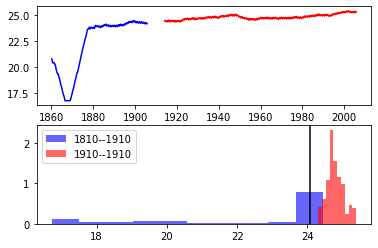

In [124]:
# A test plot for Berlin 
plots_stats(df, city="Boma")

## Climate shift: 

As it can be seen in the histograms of the trends for the two climatic period, the more recent one is shifted significantly to the right or warmer climate conditions for Berlin air temperature . Note the white space in the time-series plot (dicontinuity in the time-serie) is comming from filtering approach used. 91% of the new climate data is located to the right side of the climate mode for the 1810-1910 period. Mode is the most frequent temperature in the histogram. One could also use the mean but if you have outliers in the data the mean might be influenced. I will calculate this number (percent of the data located to the right side of the mode for the 1810-1910 period) for all cities around the world! 






In [74]:
#lets do the diff index to see how much of the recent climate 1910 to 2010 is on the right hand of the 
# past climate mode  (1810-1910)
data_final = pd.DataFrame()
data = []
city_name = []
index= []
lati = []
long = []
k = 0


#df['AverageTemperature'].replace(r'^\s*$', np.nan, regex=True, inplace=True)    
df['AverageTemperature'].fillna(df.AverageTemperature.mean(), inplace=True)

df_1800 = df[(datetime(df.dt) > datetime('1810-01-01')) & (datetime(df.dt) < datetime('1910-01-01'))]
df_1900 = df[(datetime(df.dt) > datetime('1910-01-01')) & (datetime(df.dt) < datetime('2010-01-01'))]


for city in set(df.City) : 
    k+=1
    index.append(k)
    city_name.append(city)
    
    #print(city)
    x_1800 = df_1800[df_1800.City == city].AverageTemperature
    x_1900 = df_1900[df_1900.City == city].AverageTemperature
  


    #print((x_1900.isnull()==False).sum())
    if (x_1900.isnull()==False).sum() < 1000 :
        data.append(float('NaN'))
        long.append(float('NaN'))
        lati.append(float('NaN')) 
        continue
    long.append(df_1800[df_1800.City == city].Longitude.values[0])
    lati.append(df_1800[df_1800.City == city].Latitude.values[0])    
    xx_1800 = seasonal_decompose(x_1800, model='additive',filt=None, period=100)
    #plt.plot(datetime(df_1800.dt[xx_1800.trend.index]),xx_1800.trend ,color='blue');
    xx_1900 = seasonal_decompose(x_1900, model='additive',filt=None, period=100)
    #plt.plot(datetime(df_1900.dt[xx_1900.trend.index]),xx_1900.trend ,color='red');
    n, x = np.histogram(xx_1800.trend[xx_1800.trend.isnull()==False],20)  
    #plt.plot(x, density(x), alpha=.3, color="blue")
    x1 = x[1:]
    # find the mode of the first histogram
    dx = (x1.max()-x1.min())/20
    maxx = x1[ n == n.max()]-dx
    #plt.axvline(x1[ n == n.max()]-dx,color='k')
    n, x = np.histogram(xx_1900.trend[xx_1900.trend.isnull()==False],20)  
    #plt.plot(x, density(x), alpha=.3, color="red")
    
    data.append((xx_1900.trend > maxx[0]).sum() / xx_1900.trend.shape[0])
    
# intialise data of lists. 
datas = {'City':city_name, 'val':data, 'lon':long, 'lat':lati} 
  
# Create DataFrame 
df_final = pd.DataFrame(datas)     



In [143]:
df_final.to_csv('df_final.csv')

In [87]:
f[-10:]

array([0.91659716, 0.91659716, 0.91659716, 0.91659716, 0.91659716,
       0.91659716, 0.91659716, 0.94912427, 0.95829858, 0.96969697])

In [141]:
# there is still some problems with the data as it seems that all indian cities are alike: 
# I test it as follows: 

#just for 100 first :
for i in f[0:30]:
    print(i)
    sit = df_final[(df_final.val > i-.00000001) & (df_final.val < i+.00000001)].City.values
    if len(sit)>1:
    
        print(sit)
        print('---------')

0.07839866555462886
0.08507089241034195
['Nakuru' 'Nairobi']
---------
0.08507089241034195
['Nakuru' 'Nairobi']
---------
0.43369474562135113
0.44662218515429525
0.45663052543786486
0.4599666388657214
0.46246872393661387
0.4628857381150959
0.463302752293578
0.46497080900750626
0.4708090075062552
0.4962468723936614
0.5095913261050876
0.548790658882402
0.5512927439532944
0.5587989991659716
['Fuyu' 'Honggang' 'Shuangcheng' 'Hulan' 'Zhaodong' 'Qianguo' 'Longfeng'
 'Harbin' 'Anda']
---------
0.5587989991659716
['Fuyu' 'Honggang' 'Shuangcheng' 'Hulan' 'Zhaodong' 'Qianguo' 'Longfeng'
 'Harbin' 'Anda']
---------
0.5587989991659716
['Fuyu' 'Honggang' 'Shuangcheng' 'Hulan' 'Zhaodong' 'Qianguo' 'Longfeng'
 'Harbin' 'Anda']
---------
0.5587989991659716
['Fuyu' 'Honggang' 'Shuangcheng' 'Hulan' 'Zhaodong' 'Qianguo' 'Longfeng'
 'Harbin' 'Anda']
---------
0.5587989991659716
['Fuyu' 'Honggang' 'Shuangcheng' 'Hulan' 'Zhaodong' 'Qianguo' 'Longfeng'
 'Harbin' 'Anda']
---------
0.5587989991659716
['Fuyu' '

### that must be usuall because they are cities near to each other and show the same warming trends. 


In [142]:
df_final.head()

,City,val,lon,lat
0,Dasoguz,0.635530,59.64E,40.99N
1,Boma,0.916597,12.91E,5.63S
2,Darjiling,0.916597,87.76E,26.52N
3,Montevideo,0.916597,56.43W,34.56S
4,Khoy,0.906589,44.75E,37.78N


## Now is time for the map plots 
